# SEIR model class experiments

Utilities for train, forecasting and plotting are now provided in nb_utils.
Documentation for the helper functions are available as docstrings.

Set the appropriate training parameters and forecast parameters in the 
corresponding cells.

train_eval   
> Train and evaluate models (currently we only support SEIR family). 
  Default configuration parameters for train and test files are 
  provided as train_config.json and test_config.json respectively.
  Search paramters, loss functions etc, are specified in the config
  files.

forecast, plot
> Generate forecasts using a trained model and plotting utilities.

In [1]:
import json
import pandas as pd
import mlflow
import os

from datetime import datetime, timedelta

from nb_utils import train_eval
from nb_utils import forecast
from nb_utils import plot
from nb_utils import plot_m1, plot_m2, plot_m3
from nb_utils import train_eval_plot

## Load default configurations

In [2]:
with open('train_config.json') as f_train, \
    open('test_config.json') as f_test, \
    open('forecast_config.json') as f_forecast, \
    open('mlflow_credentials.json') as f_cred:
    default_train_config = json.load(f_train)
    default_test_config = json.load(f_test)
    default_forecast_config = json.load(f_forecast)
    mlflow_credentials = json.load(f_cred)

## Set the model class

In [3]:
model_class = 'SEIHRD'
default_train_config['model_class'] = model_class
default_test_config['model_class'] = model_class
default_forecast_config['model_class'] = model_class

## Optional: Modify training loss function

In [4]:
variable_and_weights = [('confirmed', 0.25) , ('recovered', 0.25), ('deceased', 0.25), ('hospitalized', 0.25)]
weights = {'metric_name' : 'mape', 'variable_weights' : []}
for (variable, weight) in variable_and_weights:
    weights['variable_weights'].append({
        "variable" : variable,
        "weight" : weight
    })
default_train_config['training_loss_function'].update(weights)

## Training parameters

In [5]:
region = 'ahmedabad'
region_type = 'district'

In [6]:
#Current day : Last day without the flattening of counts
current_day = datetime.now().date() - timedelta(1)

# Train1 : 1 week interval starting 2 weeks prior to current day
train1_start_date = current_day - timedelta(14)
train1_end_date = current_day - timedelta(8)
train1_run_day = train1_start_date - timedelta(1)

train1_start_date = train1_start_date.strftime("%-m/%-d/%y")
train1_end_date = train1_end_date.strftime("%-m/%-d/%y")
train1_run_day = train1_run_day.strftime("%-m/%-d/%y")

# Train2 : 1 week interval starting 1 week prior to current day
train2_start_date = current_day - timedelta(7)
train2_end_date = current_day
train2_run_day = train2_start_date - timedelta(1)

train2_start_date = train2_start_date.strftime("%-m/%-d/%y")
train2_end_date = train2_end_date.strftime("%-m/%-d/%y")
train2_run_day = train2_run_day.strftime("%-m/%-d/%y")

# Test: 1 week interval prior to current day
test_start_date = current_day - timedelta(7)
test_end_date = current_day
test_run_day = test_start_date - timedelta(1)

test_start_date = test_start_date.strftime("%-m/%-d/%y")
test_end_date = test_end_date.strftime("%-m/%-d/%y")
test_run_day = test_run_day.strftime("%-m/%-d/%y")

## train_eval on the region of interest

In [7]:
params, metrics, train1_params, train2_params = train_eval(region, region_type, 
                                                           train1_start_date, train1_end_date, 
                                                           train2_start_date, train2_end_date, train2_run_day,
                                                           test_start_date, test_end_date,
                                                           default_train_config, default_test_config,
                                                           max_evals = 1000,
                                                           mlflow_log = False,
                                                           name_prefix = region)

t = 7.90                                                
t = 7.90                                                                          
  0%|          | 1/1000 [00:00<01:50,  9.03trial/s, best loss: 1025.4627198090411]

/Users/nayana/.local/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


t = 7.90                                                                          
t = 7.90                                                                         
t = 7.90                                                                          
t = 7.90                                                                          
t = 7.90                                                                          
t = 7.90                                                                          
t = 7.90                                                                          
t = 7.90                                                                          
t = 7.90                                                                          
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t 

t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                    

t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                         

t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                         

t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                    

t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                         

t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                            

t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                         

t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                         

t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                    

t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                    

## Inspect model parameters

In [8]:
train1_params

{'model_parameters': {'EbyCRatio': 0.08331189869615119,
  'F_fatalities': 0.11974969088062785,
  'F_hospitalization': 0.0041964243935975355,
  'F_icu': 0.05,
  'IbyCRatio': 0.5127391108091799,
  'LatentEbyCRatio': {'5/13/20': 0.08331189869615119,
   '5/20/20': 0.1390868195296007},
  'LatentIbyCRatio': {'5/13/20': 0.5127391108091799,
   '5/20/20': 0.5813796796981593},
  'MAPE': 10.225514550329374,
  'incubation_period': 5,
  'infectious_period': 8.124176027392705,
  'r0': 0.5538180169659361},
 'model_type': 'SEIHRD',
 'region': 'ahmedabad',
 'region_type': 'district'}

In [9]:
train2_params

{'model_parameters': {'EbyCRatio': 0.10188926995897611,
  'F_fatalities': 0.11987430465220941,
  'F_hospitalization': 0.007282248836233435,
  'F_icu': 0.05,
  'IbyCRatio': 0.35284199986889925,
  'LatentEbyCRatio': {'5/20/20': 0.10188926995897611,
   '5/28/20': 0.9575945175443268},
  'LatentIbyCRatio': {'5/20/20': 0.35284199986889925,
   '5/28/20': 0.4783097164341951},
  'MAPE': 9.567267379491561,
  'incubation_period': 5,
  'infectious_period': 9.838343606026655,
  'r0': 2.6907881161183527},
 'model_type': 'SEIHRD',
 'region': 'ahmedabad',
 'region_type': 'district'}

In [10]:
metrics

{'TestMAPE': 70.77054233996628,
 'TestRMLSE': 0,
 'Test_mape_confirmed': 12.572523460087801,
 'Test_mape_confirmed_weight': 1.0,
 'Test_mape_deceased': 16.558813169272113,
 'Test_mape_deceased_weight': 1.0,
 'Test_mape_hospitalized': 21.86695305477246,
 'Test_mape_hospitalized_weight': 1.0,
 'Test_mape_recovered': 5.6181441878406515,
 'Test_mape_recovered_weight': 1.0,
 'Train1MAPE': 40.902058201317494,
 'Train1RMLSE': 0,
 'Train1_EbyCRatio': 0.08331189869615119,
 'Train1_F_fatalities': 0.11974969088062785,
 'Train1_F_hospitalization': 0.0041964243935975355,
 'Train1_IbyCRatio': 0.5127391108091799,
 'Train1_LatentEbyCRatio_5/13/20': 0.08331189869615119,
 'Train1_LatentEbyCRatio_5/20/20': 0.1390868195296007,
 'Train1_LatentIbyCRatio_5/13/20': 0.5127391108091799,
 'Train1_LatentIbyCRatio_5/20/20': 0.5813796796981593,
 'Train1_infectious_period': 8.124176027392705,
 'Train1_mape_confirmed': 2.525209062590807,
 'Train1_mape_confirmed_weight': 1.0,
 'Train1_mape_deceased': 28.72741562499777

## Generate plots

t = 7.90

/Users/nayana/.local/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/Users/nayana/.local/lib/python3.6/site-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,



t = 8.90


/Users/nayana/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


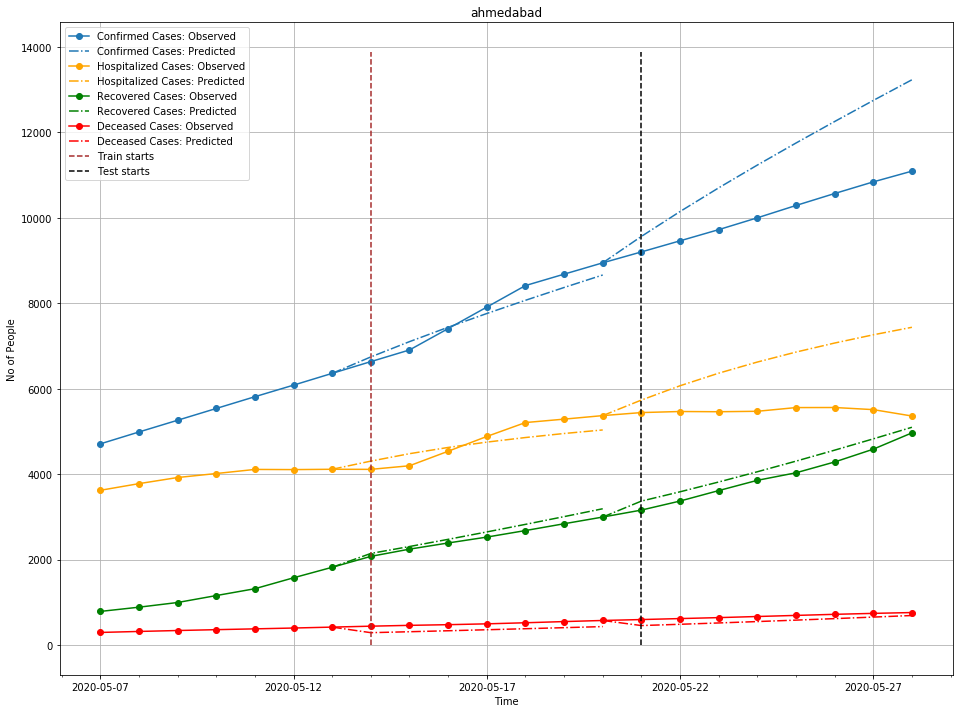

In [11]:
%matplotlib inline
plot_m1(train1_params, train1_run_day, train1_start_date, train1_end_date, 
        test_run_day, test_start_date, test_end_date, 
        rolling_average = False, uncertainty = False, 
        plot_config = 'plot_config.json', plot_name = region+'_m1.png')

/Users/nayana/.local/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/Users/nayana/.local/lib/python3.6/site-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


t = 8.90


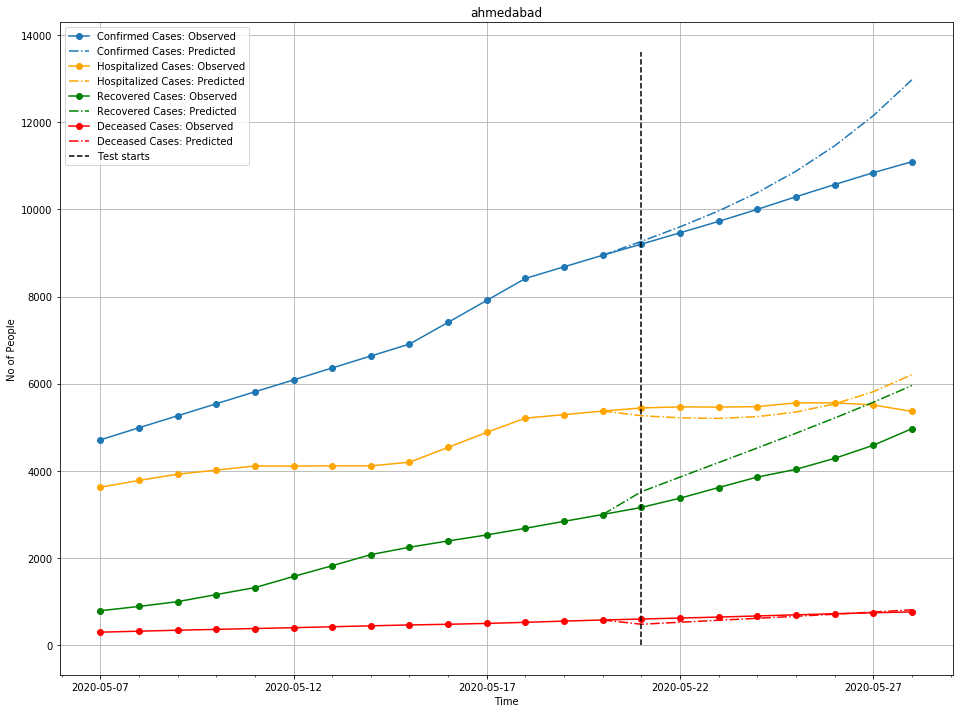

In [12]:
%matplotlib inline
plot_m2(train2_params, train1_start_date, train1_end_date, 
        test_run_day, test_start_date, test_end_date, plot_name = region+ '_m2.png')

/Users/nayana/.local/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/Users/nayana/.local/lib/python3.6/site-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


t = 31.90


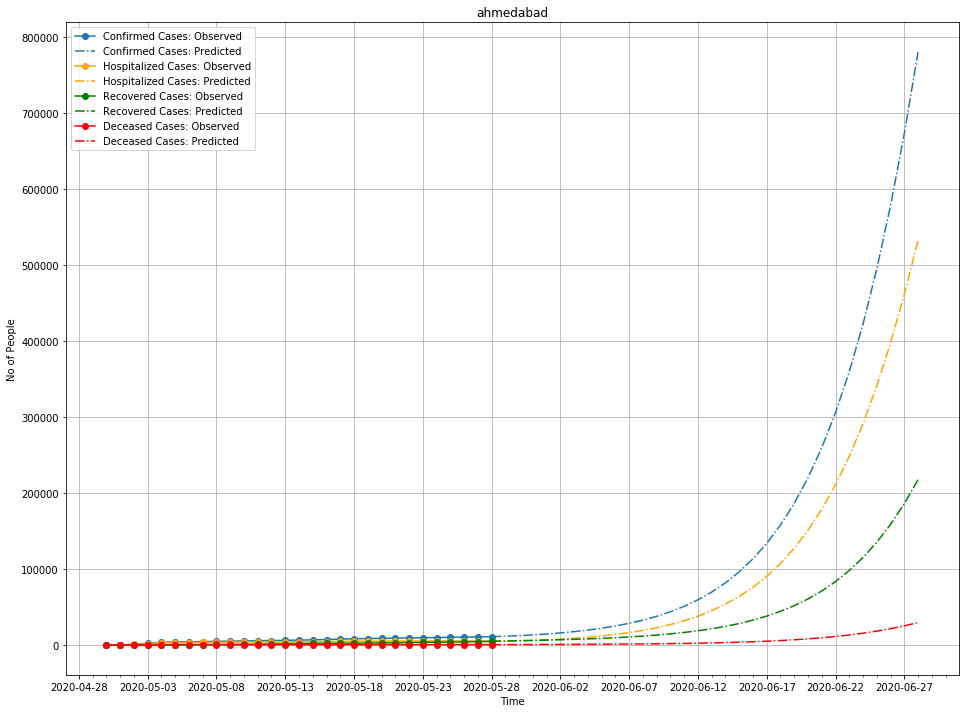

In [13]:
%matplotlib inline
forecast_start_date = (datetime.strptime(train2_end_date, "%m/%d/%y") + timedelta(1)).strftime("%-m/%-d/%y")
forecast_length = 30 # Forecast for 30 days
plot_m3(train2_params, train1_start_date, 
        forecast_start_date, forecast_length, plot_name = region +'_m3.png')

## MLflow setup

Set MLflow username, password and experiment.

In [14]:
os.environ['MLFLOW_TRACKING_USERNAME'] = mlflow_credentials['username']
os.environ['MLFLOW_TRACKING_PASSWORD'] = mlflow_credentials['password']

mlflow.set_tracking_uri("http://ec2-54-175-207-176.compute-1.amazonaws.com")
mlflow.set_experiment("seihrd_experiments")

## Set experiments

In [ ]:
experiments = [
    {'region':'mumbai','region_type':'district'},
    {'region':'pune','region_type':'district'},
    {'region':'ahmedabad','region_type':'district'},
    {'region':'jaipur','region_type':'district'},
    {'region':'bengaluru urban','region_type':'district'}              
]

current_day = datetime.now().date() - timedelta(1)
forecast_length = 30

## Run experiments

In [ ]:
for experiment in experiments:
    train_eval_plot(experiment['region'], experiment['region_type'], 
                    current_day, forecast_length,
                    default_train_config, default_test_config,
                    max_evals = 1000, data_source = 'tracker_district_daily', 
                    mlflow_log = True)

t = 7.90                                                
t = 7.90                                                
                                                                                  

/Users/nayana/.local/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


t = 7.90
t = 7.90                                                                         
t = 7.90                                                                         
t = 7.90                                                                         
t = 7.90                                                                         
t = 7.90                                                                         
t = 7.90                                                                          
t = 7.90                                                                          
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                       

t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                         

t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                         

t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                         

t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                    

t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                         

t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                    

t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                    

t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                    

t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                    

t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                    

/Users/nayana/.local/lib/python3.6/site-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,



t = 8.90
t = 31.90
t = 7.90                                                
t = 7.90                                                
t = 7.90                                                                          
t = 7.90                                                                          
t = 7.90                                                                          
t = 7.90                                                                          
t = 7.90                                                                          
t = 7.90                                                                          
t = 7.90                                                                          
t = 7.90                                                                          
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                          

t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                         

t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                    

t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                         

t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                         

t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                         

t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                         

t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                    

t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                    

t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                    

t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                    

t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                    

t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                    

t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                         

t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                         

t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                         

t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                    

t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                         

t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                         

t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                         

t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                    

t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                    

t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                    

t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                         

t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                         

t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                         

t = 8.90                                                
t = 8.90                                                                          
t = 8.90                                                                          
t = 8.90                                                                          
t = 8.90                                                                          
t = 8.90                                                                          
t = 8.90                                                                          
t = 8.90                                                                          
t = 8.90                                                                          
t = 8.90                                                                          
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                    

t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                         

t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                         

t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                    

t = 8.90                                                                          
t = 8.90                                                                          
t = 8.90                                                                          
t = 8.90                                                                          
t = 8.90                                                                          
t = 8.90                                                                          
t = 8.90                                                                          
t = 8.90                                                                          
t = 8.90                                                                          
t = 8.90                                                                          
t = 8.90                                                                          
t = 8.90                                                                          
t = 

t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                           
t = 8.90                                                                    

t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                    

t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                    

t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                                            
t = 7.90                                                         

t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                    

t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                           
t = 7.90                                                                    

t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                         

t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                                            
t = 8.90                                                         